In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [4]:
# load the dataset
housing = fetch_california_housing()

In [5]:
# convert the data into readable pandas dataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [6]:
# add the target column(price we want to predict)
# Note: target will be(2.5 = $250,000)
df["Price"] = housing.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]


In [7]:
# now check for missing values or dataTypes
print("---info---")
print(df.info())

# for statistical summary
print("---summary---")
print(df.describe())

---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
---summary---
             MedInc      HouseAge  ...     Longitude         Price
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  .

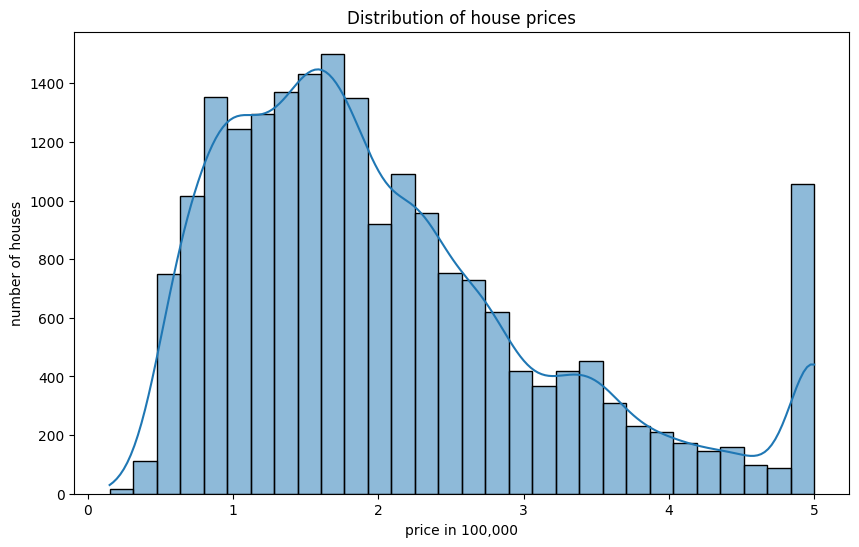

In [8]:
# plot the price
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of house prices")
plt.xlabel("price in 100,000")
plt.ylabel("number of houses")
plt.show()

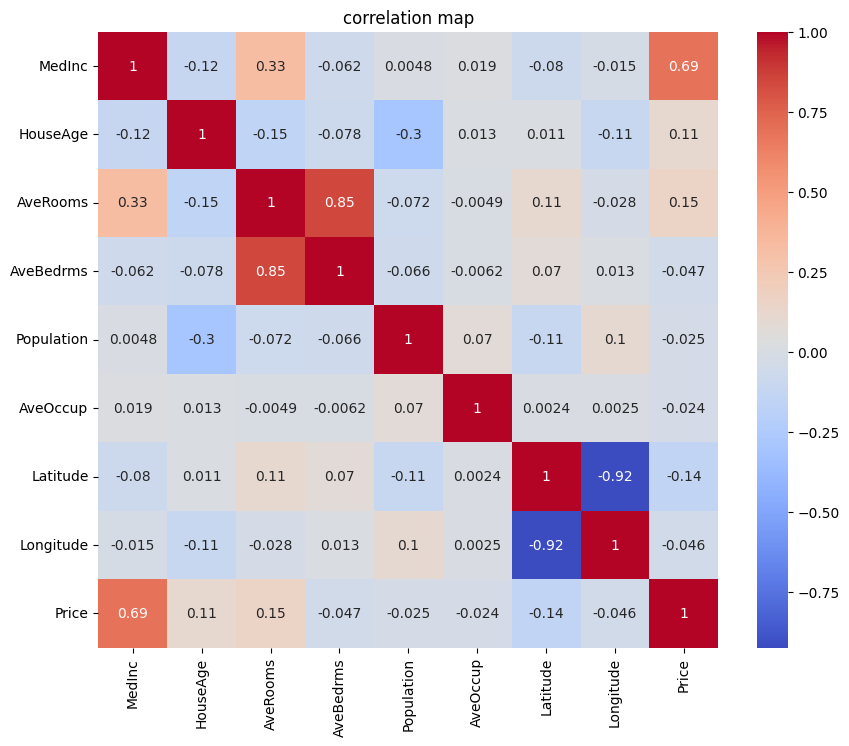

In [9]:
plt.figure(figsize=(10,8))
# caculate correlations
correlation_matrix = df.corr()
# heatmap hist
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation map")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
# define x(inputs) and y(outputs)
X = df.drop("Price", axis = 1)
y = df["Price"]
# split data
# randomstate = 42 means we get same split everytime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(f"trainigShapes: X={X_train.shape}, y={y_train.shape}")
print(f"TestingShapes: X={X_test}, y={y_test}")

trainigShapes: X=(16512, 8), y=(16512,)
TestingShapes: X=       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
20046  1.6812      25.0  4.192201  ...  3.877437     36.06    -119.01
3024   2.5313      30.0  5.039384  ...  2.679795     35.14    -119.46
15663  3.4801      52.0  3.977155  ...  1.360332     37.80    -122.44
20484  5.7376      17.0  6.163636  ...  3.444444     34.28    -118.72
9814   3.7250      34.0  5.492991  ...  2.483645     36.62    -121.93
...       ...       ...       ...  ...       ...       ...        ...
15362  4.6050      16.0  7.002212  ...  2.988938     33.36    -117.22
16623  2.7266      28.0  6.131915  ...  2.340426     35.36    -120.83
18086  9.2298      25.0  7.237676  ...  2.790493     37.31    -122.05
2144   2.7850      36.0  5.289030  ...  2.588608     36.77    -119.76
3665   3.5521      17.0  3.988839  ...  3.729911     34.22    -118.37

[4128 rows x 8 columns], y=20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814   

In [11]:
# now select and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [12]:
# now predict the prices and compare to actual prices
from sklearn.metrics import mean_absolute_error, r2_score
y_pred =model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae: .4f}")
print(f"r2_score: {r2: .4f}")

Mean Absolute Error:  0.5332
r2_score:  0.5758


In [ ]:
# the error we get using LinearRegression is 0.53 means error of around 53000 dollars
# which is really high, so lets use another model

from sklearn.ensemble import RandomForestRegressor
#n_estimators=100 means build 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# train the model
rf_model.fit(X_train, y_train)
# the RandomForestREgressor take more time then linearRegression

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# test the model 
y_predrf = rf_model.predict(X_test)
mae1= mean_absolute_error(y_test, y_predrf)
r22= r2_score(y_test, y_predrf)
print(f"RandomForest Mae: {mae1: .4f}")
print(f"RandomForest r2Score: {r22: .4f}")


RandomForest Mae:  0.3275
RandomForest r2Score:  0.8051


C:\Users\Ehsan\AppData\Local\Temp\ipykernel_11072\1948011318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="importance", data=get_feature_importance_df, palette="viridis")


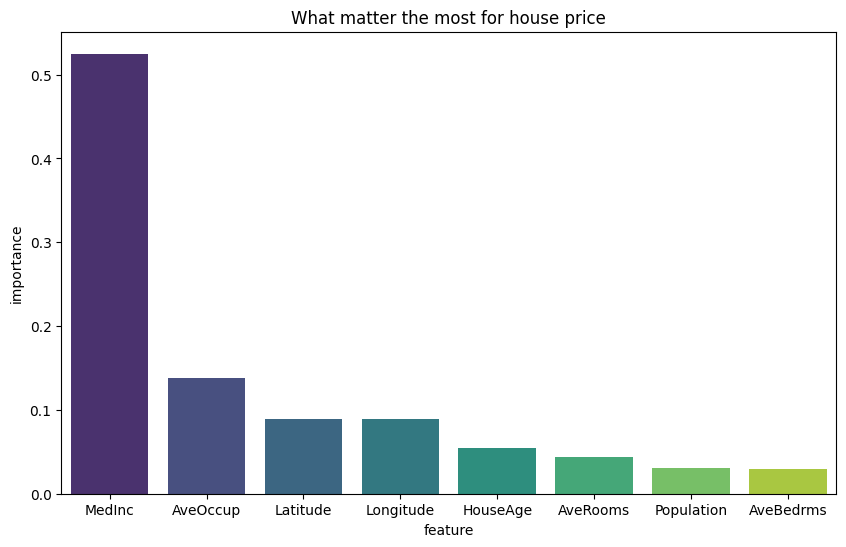

In [21]:
# To get important features
importances = rf_model.feature_importances_

feature_names = X.columns
get_feature_importance_df = pd.DataFrame({
    "feature" : feature_names,
    "importance" : importances
}).sort_values(by = "importance", ascending =  False)

#visualize it
plt.figure(figsize=(10,6))
sns.barplot(x="feature", y="importance", data=get_feature_importance_df, palette="viridis")
plt.title("What matter the most for house price")
plt.show()

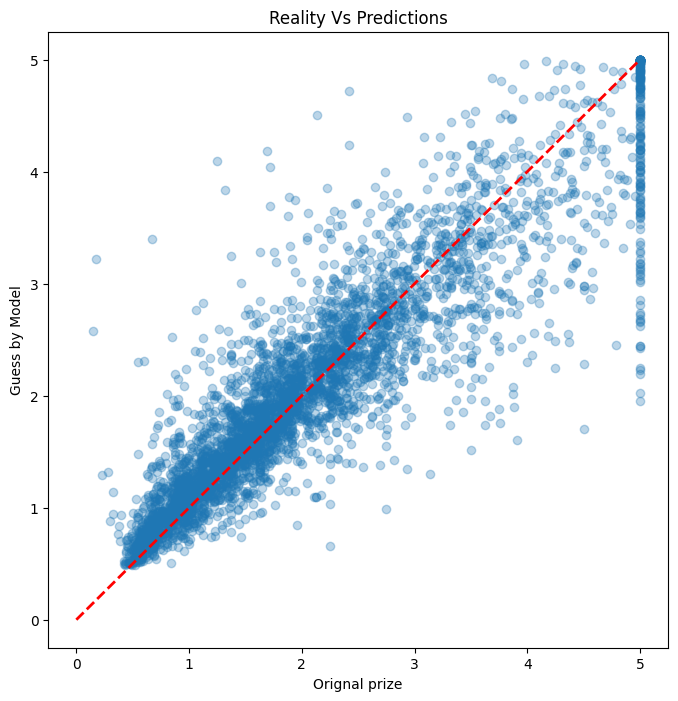

In [24]:
# Reality Vs Predictions
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_predrf, alpha=0.3)
# To draw perfect prediction line
plt.plot([0,5], [0,5], "--r", linewidth=2)

plt.xlabel("Orignal prize")
plt.ylabel("Guess by Model")
plt.title("Reality Vs Predictions")
plt.show()




In [27]:
# 1. Define our "Fake House" as a DataFrame
# We use a DataFrame so the column names match exactly what the model expects.
my_fake_house = pd.DataFrame({
    'MedInc': [0.5],        # Very wealthy neighborhood ($85k income)
    'HouseAge': [5.0],      # Nearly new house (5 years old)
    'AveRooms': [8.0],      # Large house (8 rooms total)
    'AveBedrms': [2.0],     # 2 Bedrooms
    'Population': [200.0],  # Quiet street (low population)
    'AveOccup': [3.0],      # 3 people per house
    'Latitude': [37.77],    # Location: San Francisco (Expensive!)
    'Longitude': [-122.41]
})

# 2. Ask the model to predict
# The model outputs an array, so we grab the first item [0]
predicted_value = rf_model.predict(my_fake_house)[0]

# 3. Convert the weird number (e.g., 4.52) into real dollars
# Remember: The dataset target is in units of $100,000
final_price = predicted_value * 100_000

print(f"The model thinks this house is worth: ${final_price:,.2f}")

The model thinks this house is worth: $223,019.00


In [28]:
import joblib
# save the model
joblib.dump(rf_model, "House_price_predictionModel.pkl")
print("saved successfully")

saved successfully
